In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/k-means-clustering-for-heart-disease-analysis/heart_disease.csv
/kaggle/input/k-means-clustering-for-heart-disease-analysis/sample.csv


**Reference Notebook** - https://www.kaggle.com/code/tracyporter/heart-disease-kmeans-3

In [2]:
data = pd.read_csv('/kaggle/input/k-means-clustering-for-heart-disease-analysis/heart_disease.csv')

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [4]:
sub = pd.read_csv('/kaggle/input/k-means-clustering-for-heart-disease-analysis/sample.csv')

In [5]:
sub.head()

,id,cluster
0,0,0
1,1,0
2,3,0
3,4,0
4,7,0


In [6]:
sub['cluster'].value_counts()

0    299
Name: cluster, dtype: int64

In [7]:
# add cluster exists in data
data['exists'] = data['id'].isin(sub['id'])

In [8]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,False
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,False
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,True
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,False
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,False


In [9]:
pat = data[data['exists'] == True]
pat

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,True
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,True
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,True
7,7,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,910,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,True
911,911,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,True
912,912,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,True
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,True


In [10]:
pat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  278 non-null    float64
 6   chol      292 non-null    float64
 7   fbs       277 non-null    object 
 8   restecg   298 non-null    object 
 9   thalch    280 non-null    float64
 10  exang     280 non-null    object 
 11  oldpeak   279 non-null    float64
 12  slope     196 non-null    object 
 13  ca        113 non-null    float64
 14  thal      144 non-null    object 
 15  exists    299 non-null    bool   
dtypes: bool(1), float64(5), int64(2), object(8)
memory usage: 37.7+ KB


In [11]:
pat.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     21
chol          7
fbs          22
restecg       1
thalch       19
exang        19
oldpeak      20
slope       103
ca          186
thal        155
exists        0
dtype: int64

In [12]:
for col in pat:
    if pat[col].dtype == 'object':
        pat[col].fillna('NA', inplace=True)
    elif pat[col].dtype == 'int64':
        pat[col].fillna(pat[col].mode()[0], inplace=True)
    elif pat[col].dtype == 'float64':
        pat[col].fillna(pat[col].mean(), inplace=True)

pat

/tmp/ipykernel_306/1495421535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat[col].fillna(pat[col].mode()[0], inplace=True)
/tmp/ipykernel_306/1495421535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat[col].fillna(pat[col].mode()[0], inplace=True)
/tmp/ipykernel_306/1495421535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat[col].fillna('NA', inplace=True)
/tmp/ipykernel_306/1495421535.py:7: SettingWithCopyWarnin

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,exists
0,0,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,True
1,1,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,True
3,3,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,True
4,4,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,True
7,7,57,Female,Cleveland,asymptomatic,120.000000,354.0,False,normal,163.000000,True,0.600000,upsloping,0.000000,normal,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,910,51,Female,VA Long Beach,asymptomatic,114.000000,258.0,True,lv hypertrophy,96.000000,False,1.000000,upsloping,0.716814,NA,True
911,911,62,Male,VA Long Beach,asymptomatic,160.000000,254.0,True,st-t abnormality,108.000000,True,3.000000,flat,0.716814,NA,True
912,912,53,Male,VA Long Beach,asymptomatic,144.000000,300.0,True,st-t abnormality,128.000000,True,1.500000,flat,0.716814,NA,True
916,916,62,Male,VA Long Beach,typical angina,131.539568,139.0,False,st-t abnormality,140.014286,NA,0.869892,NA,0.716814,NA,True


In [13]:
pat.drop(['id', 'exists', 'dataset'], axis=1, inplace=True)
pat

/tmp/ipykernel_306/1347847355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat.drop(['id', 'exists', 'dataset'], axis=1, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect
1,67,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal
3,37,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal
4,41,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal
7,57,Female,asymptomatic,120.000000,354.0,False,normal,163.000000,True,0.600000,upsloping,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,51,Female,asymptomatic,114.000000,258.0,True,lv hypertrophy,96.000000,False,1.000000,upsloping,0.716814,NA
911,62,Male,asymptomatic,160.000000,254.0,True,st-t abnormality,108.000000,True,3.000000,flat,0.716814,NA
912,53,Male,asymptomatic,144.000000,300.0,True,st-t abnormality,128.000000,True,1.500000,flat,0.716814,NA
916,62,Male,typical angina,131.539568,139.0,False,st-t abnormality,140.014286,NA,0.869892,NA,0.716814,NA


In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for col in pat:
    if pat[col].dtype == 'object':
        pat[col] = pat[col].astype(str)
        pat[col] = enc.fit_transform(pat[col].values.reshape(-1,1))
        
pat

/tmp/ipykernel_306/2474949496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat[col] = pat[col].astype(str)
/tmp/ipykernel_306/2474949496.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pat[col] = enc.fit_transform(pat[col].values.reshape(-1,1))
/tmp/ipykernel_306/2474949496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,3.0,145.000000,233.0,2.0,1.0,150.000000,0.0,2.300000,1.0,0.000000,1.0
1,67,1.0,0.0,160.000000,286.0,0.0,1.0,108.000000,2.0,1.500000,2.0,3.000000,2.0
3,37,1.0,2.0,130.000000,250.0,0.0,2.0,187.000000,0.0,3.500000,1.0,0.000000,2.0
4,41,0.0,1.0,130.000000,204.0,0.0,1.0,172.000000,0.0,1.400000,3.0,0.000000,2.0
7,57,0.0,0.0,120.000000,354.0,0.0,2.0,163.000000,2.0,0.600000,3.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,51,0.0,0.0,114.000000,258.0,2.0,1.0,96.000000,0.0,1.000000,3.0,0.716814,0.0
911,62,1.0,0.0,160.000000,254.0,2.0,3.0,108.000000,2.0,3.000000,2.0,0.716814,0.0
912,53,1.0,0.0,144.000000,300.0,2.0,3.0,128.000000,2.0,1.500000,2.0,0.716814,0.0
916,62,1.0,3.0,131.539568,139.0,0.0,3.0,140.014286,1.0,0.869892,0.0,0.716814,0.0


In [15]:
from sklearn.cluster import KMeans

wargs = {
    'init': 'random',
    'n_init': 10,
    'random_state': 42
} 

square_error = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, **wargs)
    kmeans.fit(pat)
    square_error.append(kmeans.inertia_)

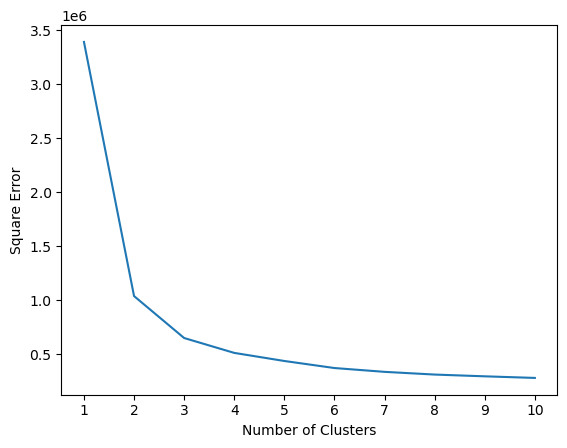

In [16]:
# Elbow method
plt.plot(range(1, 11), square_error)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Square Error")
plt.show()

In [24]:
from sklearn.metrics import davies_bouldin_score

sq_err = []

# bouldin score requires more than 1 cluster
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(pat)
    sq_err.append(davies_bouldin_score(pat, labels))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

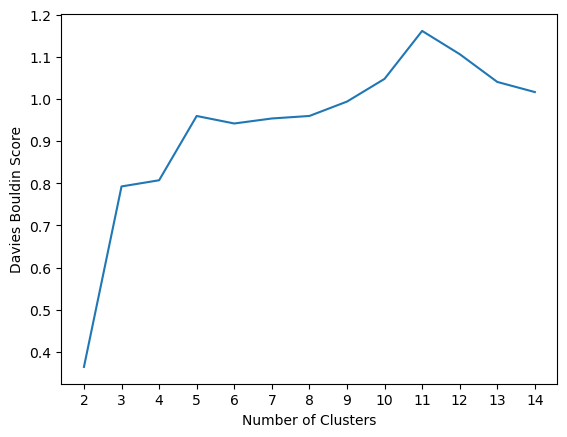

In [25]:
plt.plot(range(2, 15), sq_err)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Score")
plt.show()

In [35]:
# elbow point = 3
kmeans_ = KMeans(init='random', n_clusters=3, n_init=15, random_state=42)
kmeans_.fit(pat)
preds = kmeans_.labels_
preds

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtyp

(3, 13)


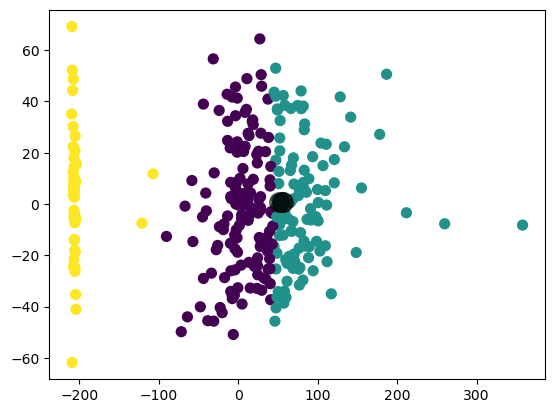

In [37]:
#Visualize
from sklearn.decomposition import PCA

pca = PCA(2)

pca_data = pca.fit_transform(pat)

x = pca_data[:,0]
y = pca_data[:,1]

plt.scatter(x, y, c=preds, s=50, cmap='viridis')

centers = kmeans_.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [32]:
from sklearn.cluster import Birch

birch_ = Birch(branching_factor=100, threshold=.5, n_clusters=3)
birch_.fit(pat)
preds_birch = birch_.labels_
preds_birch

array([0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0])

(299, 13)


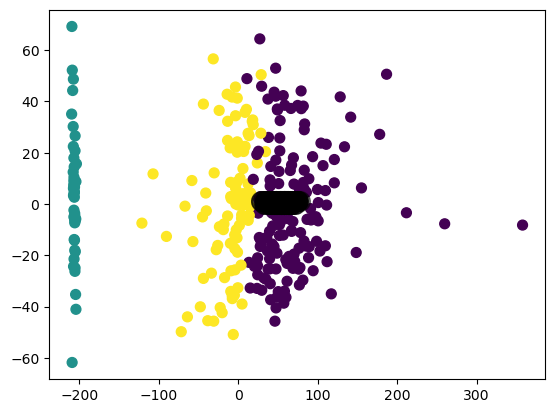

In [38]:
from sklearn.decomposition import PCA

pca = PCA(2)

pca_data = pca.fit_transform(pat)

x = pca_data[:,0]
y = pca_data[:,1]

plt.scatter(x, y, c=preds_birch, s=50, cmap='viridis')

centers = birch_.subcluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
# BDScan??

In [34]:
sub['cluster'] = preds
sub.to_csv('sub.csv', index=False)